In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.calibration import LabelEncoder
from sklearn.decomposition import PCA
import warnings


## Data Description:


**Customer Profile:**
- `Year_Birth:`Customer's birth year
- `ID:`Customer's unique identifier
- `Education:`Customer's education level
- `Marital_Status:`Customer's marital status
- `Income:`Customer's yearly household income
- `Kidhome:`Number of children in customer's household
- `Teenhome:`Number of teenagers in customer's household
- `Dt_Customer:`Date of customer's enrollment with the company
- `Recency:`Number of days since customer's last purchase
- `Complain:`1 if the customer complained in the last 2 years, 0 otherwise  

**Products:**
- `MntWines:`Amount spent on wine in last 2 years
- `MntFruits:`Amount spent on fruits in last 2 years
- `MntMeatProducts:`Amount spent on meat in last 2 years
- `MntFishProducts:`Amount spent on fish in last 2 years
- `MntSweetProducts:`Amount spent on sweets in last 2 years
- `MntGoldProds:`Amount spent on gold in last 2 years   

**Campaign:**
- `NumDealsPurchases:`Number of purchases made with a discount  
- `AcceptedCmp1:`1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- `AcceptedCmp2:`1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3:`1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4:`1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5:`1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response:`1 if customer accepted the offer in the last campaign, 0 otherwise 

**Place:**
- `NumWebPurchases:`Number of purchases made through the company’s website
- `NumCatalogPurchases:`Number of purchases made using a catalogue
- `NumStorePurchases:`Number of purchases made directly in stores
- `NumWebVisitsMonth:`Number of visits to company’s website in the last month

In [2]:
warnings.filterwarnings('ignore', category=UserWarning)
df = pd.read_csv('dataset/customer_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
has_duplicates = df.duplicated().any()
print('Data contains duplicates: ', has_duplicates)

Data contains duplicates:  False


In [7]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Data description findings:
- `Income` column contains nan values
- `Income` max value is an outlier
- `Year_Birth` min value is an outlier
- `Dt_Customer` is an object type -> Date type


## Data Cleaning & Visualization

- Replace the missing nan values and max value from `Income` with the mean value for the same age and education

In [8]:
grouped_data = df.groupby(['Year_Birth', 'Education'])['Income'].mean()
max_income = df['Income'].max()
df.loc[df['Income'] == max_income, 'Income'] = np.nan

for index, row in df.iterrows():
    # Check if the income is missing
    if pd.isnull(row['Income']):
        age = row['Year_Birth']
        education = row['Education']
        if (age, education) in grouped_data:
            # Check if the group exists in the grouped data
            interpolated_income = grouped_data.loc[(age, education)]
            df.at[index, 'Income'] = interpolated_income
            # print(f'Interpolated value at index {index}: {interpolated_income}')

- Replace outlier values in `Year_Birth` column with mean value

In [9]:
mean = df['Year_Birth'].mean()
std = df['Year_Birth'].std()
# Define the lower and upper bounds for outliers
lower_bound = mean - 2.5 * std
upper_bound = mean + 2.5 * std
# Find the outliers
outliers = df[(df['Year_Birth'] < lower_bound) | (df['Year_Birth'] > upper_bound)]
# Print the outliers
# print(outliers)
df.loc[(df['Year_Birth'] < lower_bound) | (df['Year_Birth'] > upper_bound), 'Year_Birth'] = mean

- change dtype of `Dt_Customer` from object to datetime

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

- Plot barcharts of categorical data


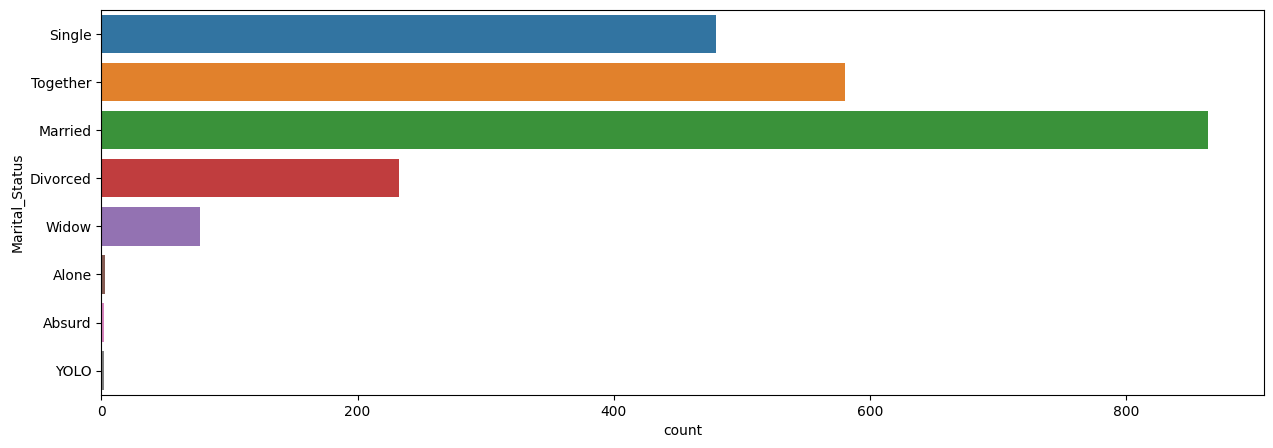

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Marital_Status' , data = df)
plt.show()

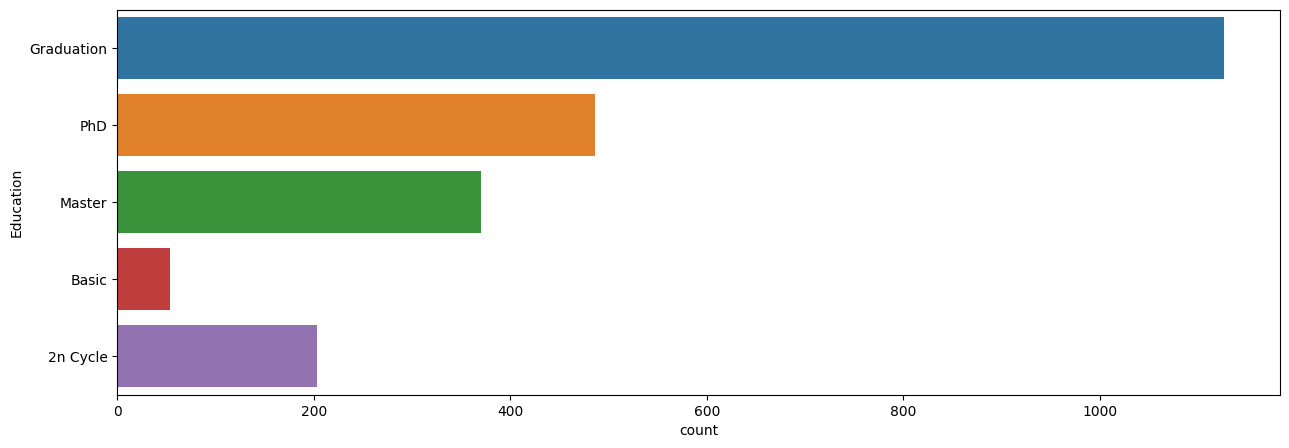

In [12]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Education' , data = df)
plt.show()

The plots above show that we have outlier categories in `Marital_Status` column and that `Education` levels are not unified

## Data preprocessing & Feature Engineering 

- count number of values for each categorical feature (`Martial_Status`, `Education`)
- unify categories  
- get the enrollment time of each customer with respect to the last added customer 
- convert `Year_Birth` to an `Age` of a customer
- convert product columns to total amount spent per customer
- convert `Kidhome` and `Teenhome` to total number of kids per customer/household
- calculate size of the family of the customer to get a better picture of the household
- determine if customer is a parent or not 
- drop redundant columns 

In [13]:
print('Total categories in the feature Marital_Status:\n', df['Marital_Status'].value_counts(), '\n')
print('Total categories in the feature Education:\n', df['Education'].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


- shrink `Marital_Status` to only 2 categories, if customer is single or living with partner

In [14]:
# Replace the outlier values with a desired value, such as 'Other'
df['Marital_Status'] = df['Marital_Status'].replace({'Absurd': 'Single', 'YOLO': 'Single',
                                                     'Married':'Partner', 'Alone':'Single',
                                                     'Widow':'Single', 'Together': 'Partner',
                                                     'Divorced':'Single'})

- replace education levels with Graduate, Postgraduate and Undergraduate

In [15]:
# Replace the outlier values with a desired value, such as 'Other'
df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate',
                                                     'Master':'Postgraduate', 'Basic':'Undergraduate',
                                                     '2n Cycle':'Undergraduate'})

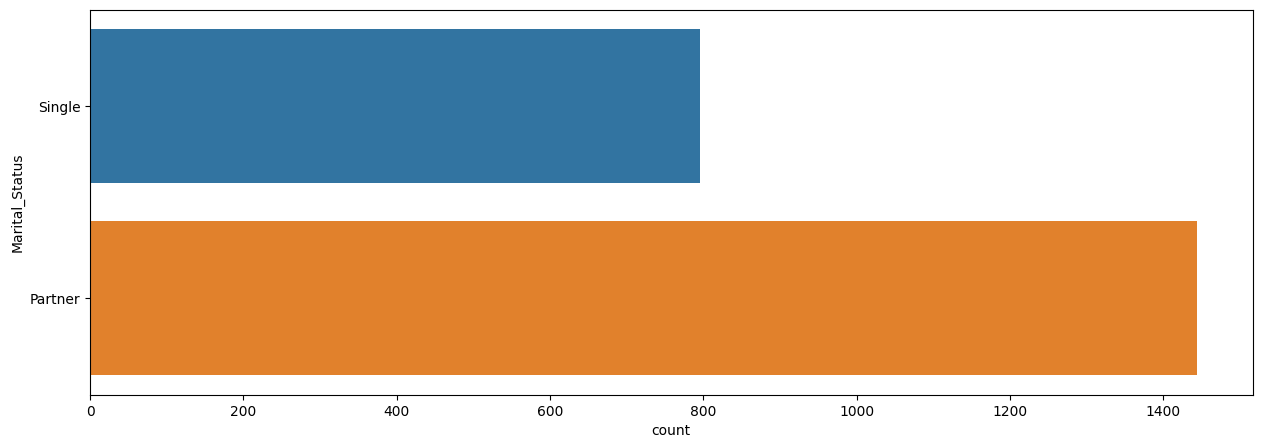

In [16]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Marital_Status' , data = df)
plt.show()

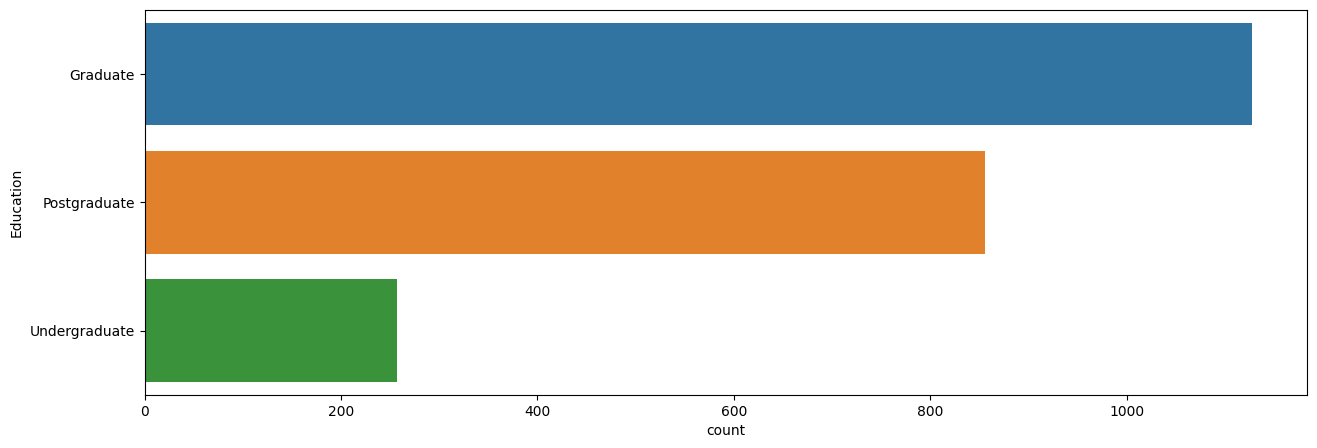

In [17]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Education' , data = df)
plt.show()

- create new `Age` column from date of birth of a customer, calculate enrollment time w.r.t most recent customer

In [18]:
df['Age'] = 2023 - df['Year_Birth']

most_recent_customer = df['Dt_Customer'].max()
df['Enrolled_Time'] = (most_recent_customer - df['Dt_Customer']).dt.days.astype(int)

- create `Total_Spent` column from all of the column products
 

In [19]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

- sum up `Kidhome` and `Teenhome` to `Kids`, lable if customer is a parent in `isParent` and get a total size of a family in `Family_Size` column 

In [20]:
df['Num_Kids'] = df['Kidhome'] + df['Teenhome']
df['isParent'] = np.where(df['Num_Kids'] > 0, 1, 0)
df['Family_Size'] = df.apply(lambda row: 1 if row['Marital_Status'] == 'Single' and row['Num_Kids'] == 0
                             else (row['Num_Kids'] + 1 if row['Marital_Status'] == 'Single' and row['Num_Kids'] != 0
                                   else row['Num_Kids']+2), axis=1)


- print information about new columns

In [21]:
new_cols = ['Num_Kids', 'isParent', 'Family_Size', 'Marital_Status', 'Teenhome', 'Kidhome']
df[new_cols].head(7)

,Num_Kids,isParent,Family_Size,Marital_Status,Teenhome,Kidhome
0,0,0,1,Single,0,0
1,2,1,3,Single,1,1
2,0,0,2,Partner,0,0
3,1,1,3,Partner,0,1
4,1,1,3,Partner,0,1
5,1,1,3,Partner,1,0
6,1,1,2,Single,1,0


- drop redundant columns and category columns for data plots


In [22]:
df_to_plot = df.drop(['ID', 'Z_Revenue', 'Z_CostContact', 'Dt_Customer', 'Marital_Status','Education', 'Year_Birth'], axis=1)

- plot correlation metrix to inspect correlation between columns


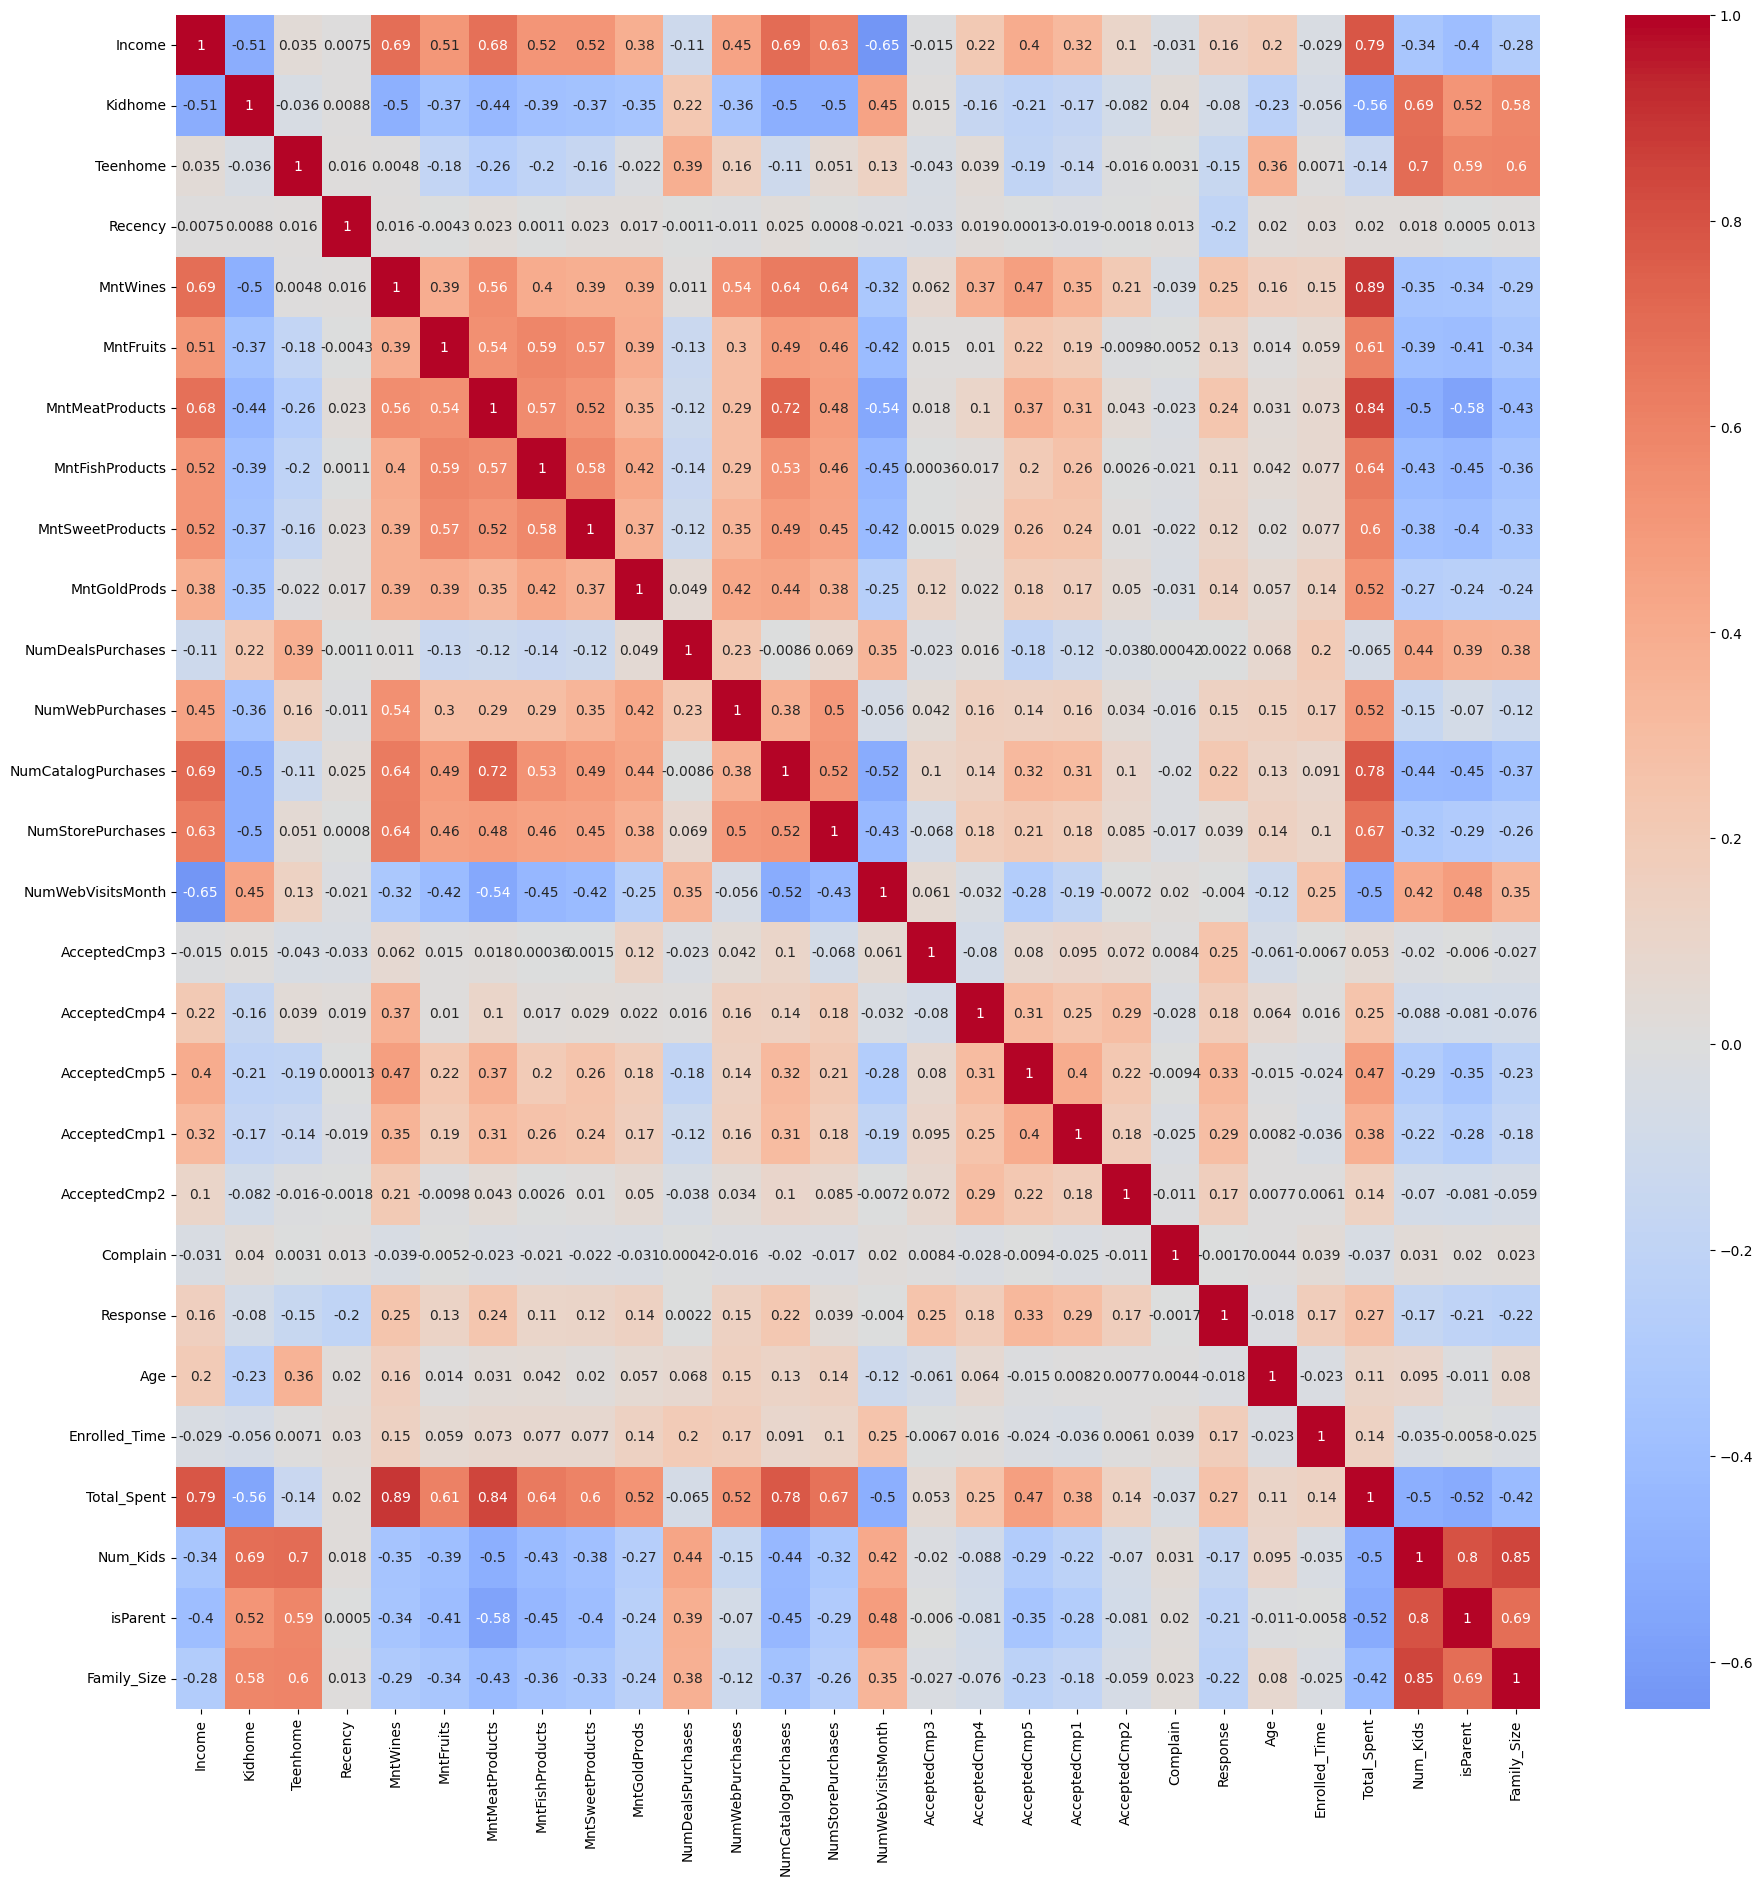

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_to_plot.corr()
plt.figure(figsize=(22,22))
# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()  

<Figure size 640x480 with 0 Axes>

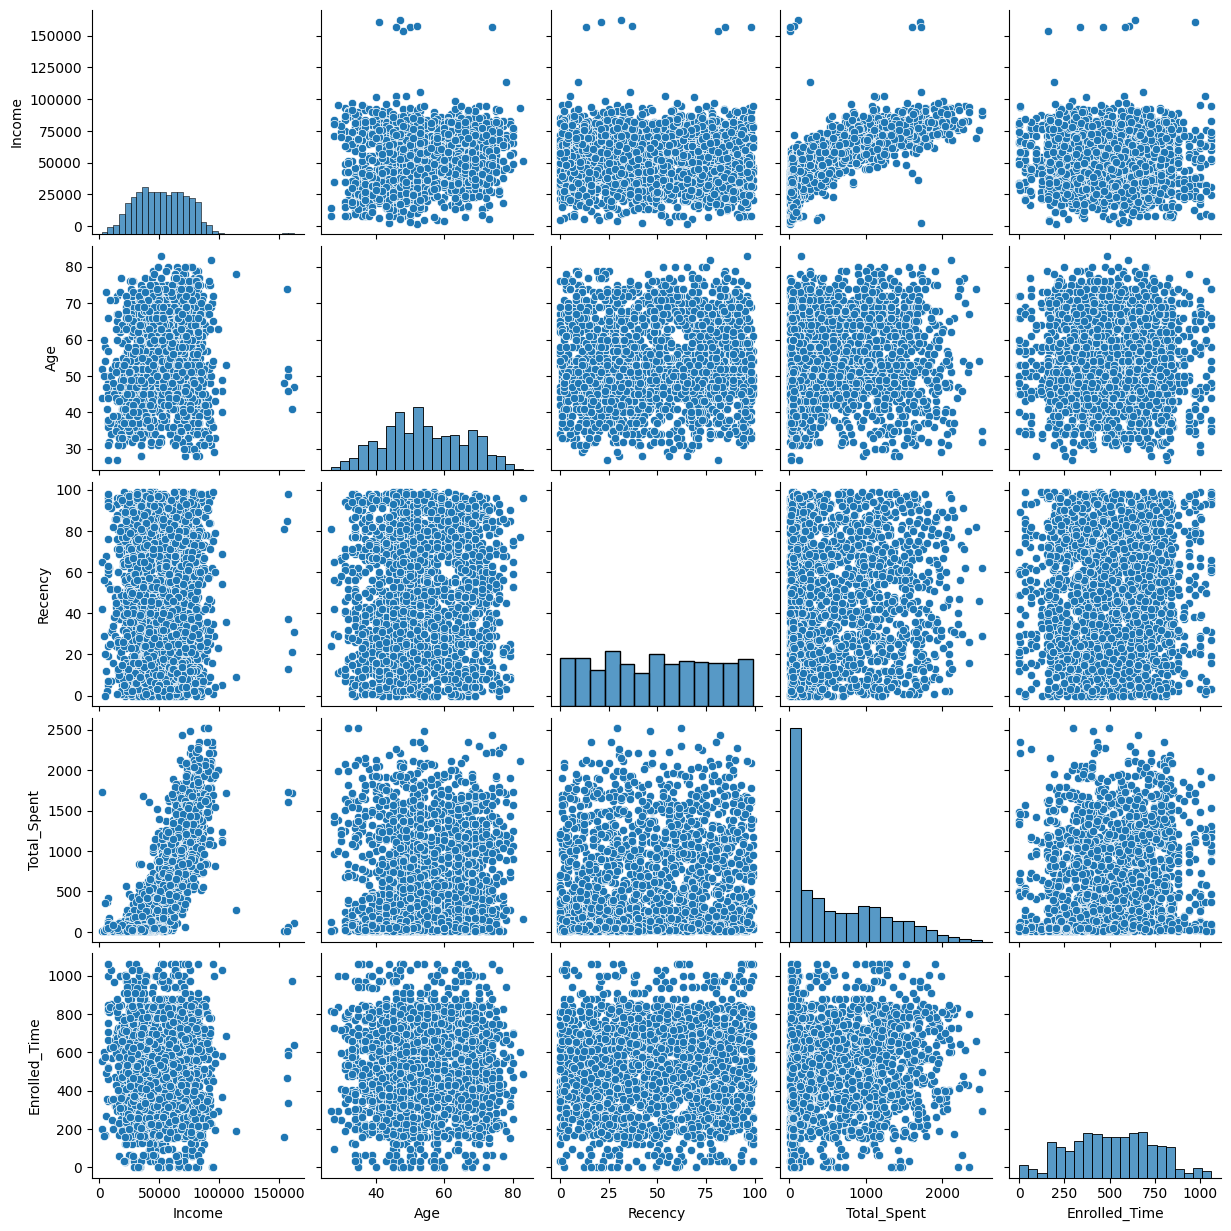

In [24]:
to_plot = ['Income', 'Age', 'Recency', 'Total_Spent', 'Enrolled_Time']
hue = 'isParent'
plt.figure()
sns.pairplot(df[to_plot])
plt.show()

## Dimensionality reduction & Standardization 

- drop redundant columns

In [25]:
df = df.drop(['ID', 'Z_Revenue', 'Z_CostContact', 'Dt_Customer', 'Year_Birth'], axis=1)

- encode categorical columns, namely Education and Marital_Status

In [26]:
# List of categorical columns to encode
columns_to_encode = ['Education', 'Marital_Status']

# Loop over each column and inplace encode
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

- bring data points to a common scale using standar scaler

In [27]:
# Creating a copy of data
ds = df.copy()
# drop the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

In [28]:
ds_scaled.head(7)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Enrolled_Time,Total_Spent,Num_Kids,isParent,Family_Size
0,-0.894974,1.346874,0.287681,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,1.409304,2.510890,-0.550785,0.693904,1.017967,1.976745,1.679417,-1.264505,-1.584605,-1.759115
1,-0.894974,1.346874,-0.262936,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-1.110409,-0.568720,-1.166125,-0.130463,1.274564,-1.667011,-0.961275,1.396361,0.631072,0.446548
2,-0.894974,-0.742460,0.916776,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,1.409304,-0.226541,1.295237,-0.542647,0.333707,-0.172468,0.282673,-1.264505,-1.584605,-0.656283
3,-0.894974,-0.742460,-1.182559,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,-0.750450,-0.910898,-0.550785,0.281720,-1.291410,-1.925433,-0.918094,0.065928,0.631072,0.446548
4,0.568341,-0.742460,0.294917,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,0.329427,0.115638,0.064556,-0.130463,-1.034813,-0.822831,-0.305254,0.065928,0.631072,0.446548
5,0.568341,-0.742460,0.491932,-0.825218,0.906934,-1.143438,0.642051,0.394768,-0.305541,-0.687068,...,0.689386,0.457817,1.295237,0.281720,0.162642,-0.254302,0.183025,0.065928,0.631072,0.446548
6,-0.894974,1.346874,0.170825,-0.825218,0.906934,-0.521805,-0.204847,0.973172,-0.013072,0.228401,...,1.049345,0.115638,0.372226,0.281720,-0.179488,1.037810,-0.026238,0.065928,0.631072,-0.656283


- apply PCA to reduce the dimensionality of data for easier processing and information retantion

In [29]:
pca = PCA(n_components=3)
pca.fit(ds_scaled)
ds_PCA = pd.DataFrame(pca.transform(ds_scaled), columns=(['col1','col2', 'col3']))
ds_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,1.205385e-16,2.873340,-5.963175,-2.530377,-0.786460,2.374051,7.449986
col2,2240.0,-6.344132e-18,1.706252,-4.320030,-1.331035,-0.164697,1.241625,6.115734
col3,2240.0,-4.758099e-18,1.219408,-3.466723,-0.831147,-0.025932,0.803939,6.553599


- since we reduced data to 3 dimensions we can plot them in 3D space

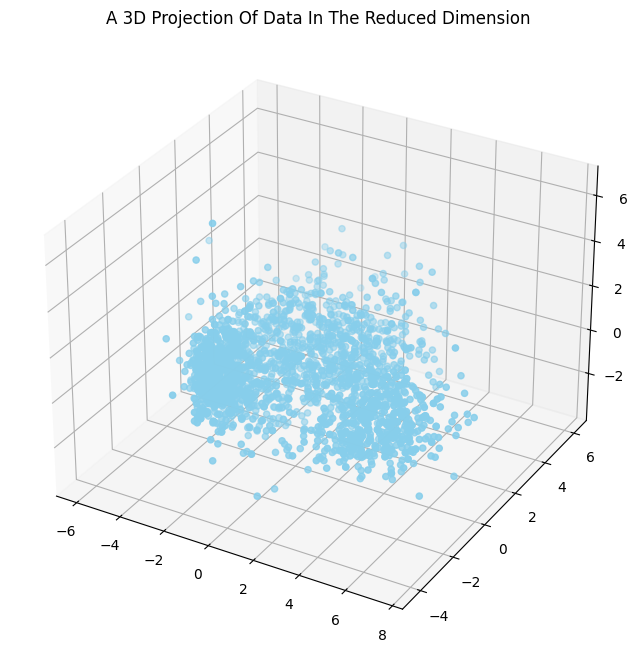

In [30]:
#A 3D Projection Of Data In The Reduced Dimension
x =ds_PCA['col1']
y =ds_PCA['col2']
z =ds_PCA['col3']
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='skyblue', marker='o' )
ax.set_title('A 3D Projection Of Data In The Reduced Dimension')
plt.show()

## Segmentation:


### Use Elbow method to determine number of clusters

In [31]:
# compute inertia for number of clusters
inertia = []
for n in range(1 , 11):
    model = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, 
                        tol=0.0001,  random_state=42  , algorithm='elkan') )
    model.fit(ds_PCA)
    inertia.append(model.inertia_)

C:\Users\matej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


- `Select number of clusters based on inertia (squared distance between centroids and data points)`

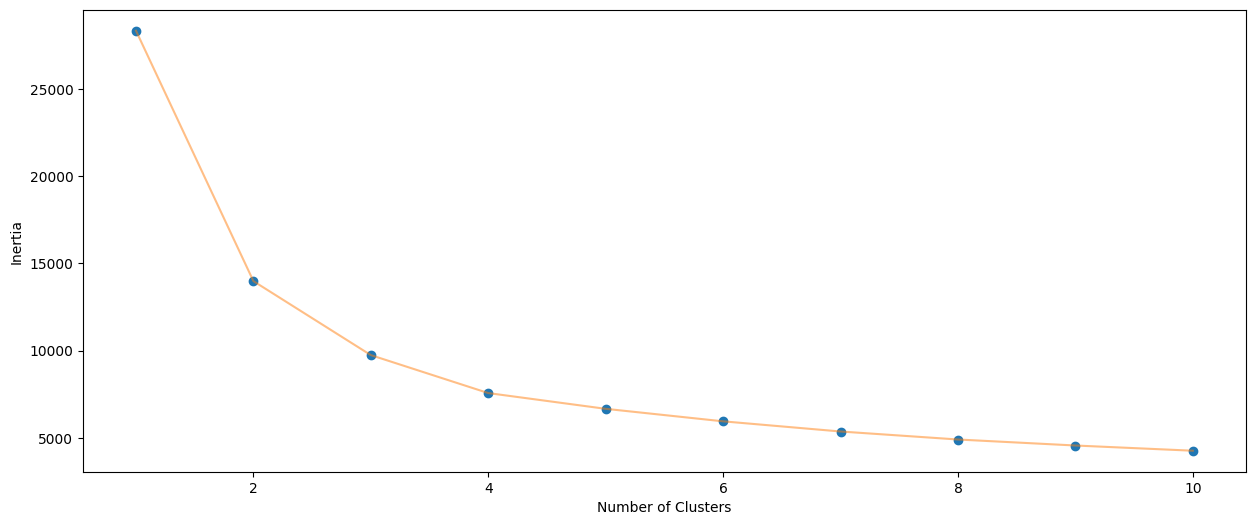

In [32]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Using agglomerative clustering gives us better results comapred to k-means clustering since data is not only convex, therfore we need algorithm that can pick on more complex relations between data points. The data is also relatively small.**

In [33]:
# Choose the number of clusters (segments)
clusters = 4
# Apply k-means clustering
# model = (KMeans(n_clusters = clusters, init='k-means++', n_init = 10 , max_iter=300, 
#                         tol=0.0001,  random_state=42  , algorithm='elkan') )
# model.fit(ds_PCA)
# # Get the cluster labels for each data point
# ds_PCA['Clusters'] = model.labels_
# df['Clusters'] = model.labels_
# # Get centroids for each cluster
# centroids = model.cluster_centers_

#Initiating the Agglomerative Clustering model 
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
labels = model.fit_predict(ds_PCA)

ds_PCA['Clusters'] = labels
df['Clusters'] = labels


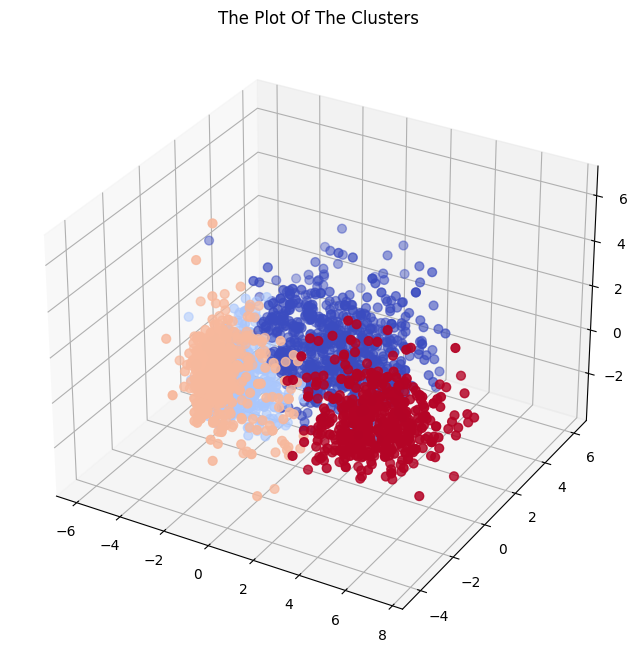

In [34]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=ds_PCA['Clusters'], marker='o', cmap ='coolwarm' )
ax.set_title('The Plot Of The Clusters')
plt.show()

# Analysis of clusters

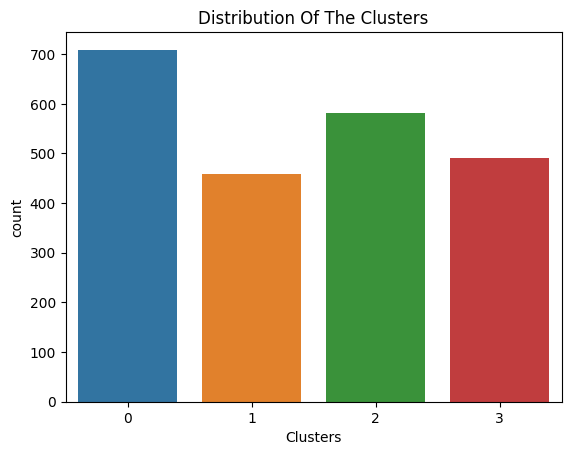

In [35]:
pl = sns.countplot(x=df['Clusters'])
pl.set_title('Distribution Of The Clusters')
plt.show()

- clients are fairly distributed in clusters


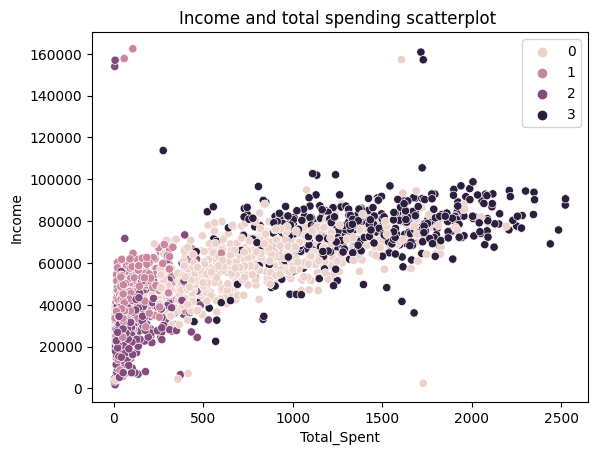

In [36]:
pl = sns.scatterplot(data = df,x=df['Total_Spent'], y=df['Income'],hue=df['Clusters'])
pl.set_title('Income and total spending scatterplot ')
plt.legend()
plt.show()

From this scatter plot we can observe that:
- Cluster 0: spends in total an average amount despite having high income
- Cluster 1: spends low amount and has low income 
- Cluster 2: will spend low to average amount and has average income
- Cluster 3: spends very high amount of money and has high income -> MVP customers


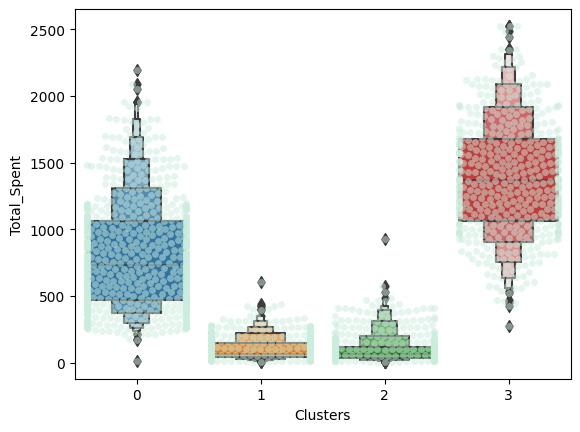

In [37]:
plt.figure()
pl=sns.swarmplot(x=df['Clusters'], y=df['Total_Spent'], color= '#CBEDDD', alpha=0.5 )
pl=sns.boxenplot(x=df['Clusters'], y=df['Total_Spent'])
plt.show()

- from the swarm box plot we can observe that majority of high spenders are located in cluster 0 and 3 

In [38]:
#TODO draw plots to picture which products are the most poular amongst cluster

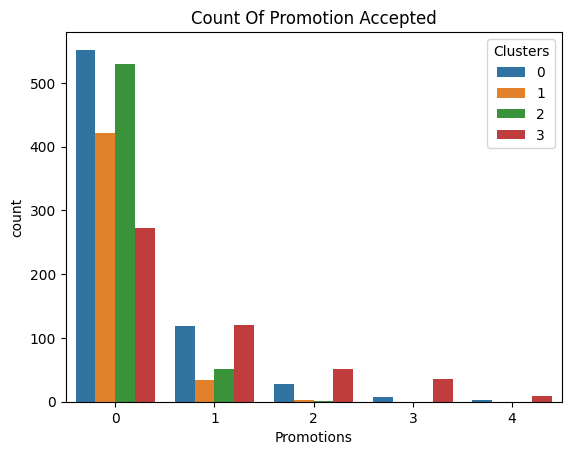

In [39]:
#Creating a feature to get a sum of accepted promotions 
df['Total_Promos'] = df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df['Total_Promos'],hue=df['Clusters'])
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Promotions')
plt.show()

we can observe that:
- cluster 3 paricipated in all 5 campaigns
- 1st campaign succeed while the 2nd one did fairly poorly and campaing 3 4 and 5 failed completely 
- cluster 1 and 2 were the most active in successful campain, while cluster 3 contains the most loyal customers

**Campaign 2-5 need to be reevaluated to see what failed compared to 1st promotion in order to avoid doing the same mistakes in upcoming promotions**

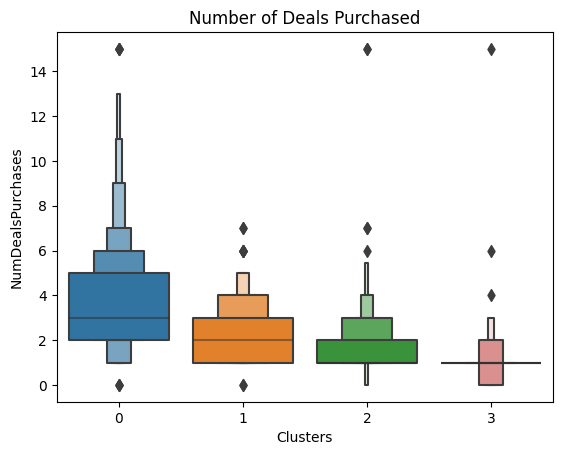

In [40]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df['NumDealsPurchases'],x=df['Clusters'])
pl.set_title('Number of Deals Purchased')
plt.show()

Cluster 0 was the most engaging in purchesing deals and had the highest amount deals bought per customer followed
by cluster 2. High income cluster 3 doesnt seem to be interested in deals, perheps they do not care about the discounts.

<Figure size 640x480 with 0 Axes>

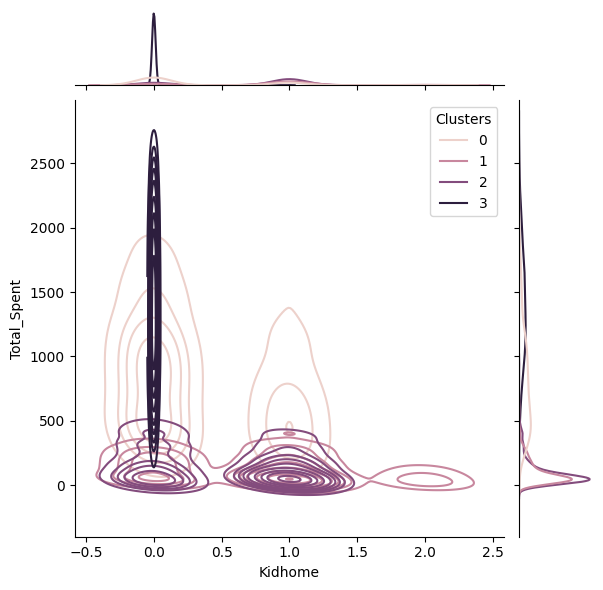

<Figure size 640x480 with 0 Axes>

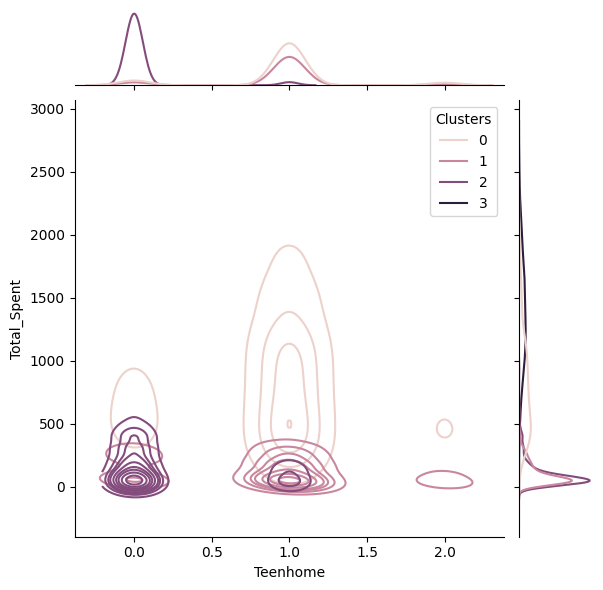

<Figure size 640x480 with 0 Axes>

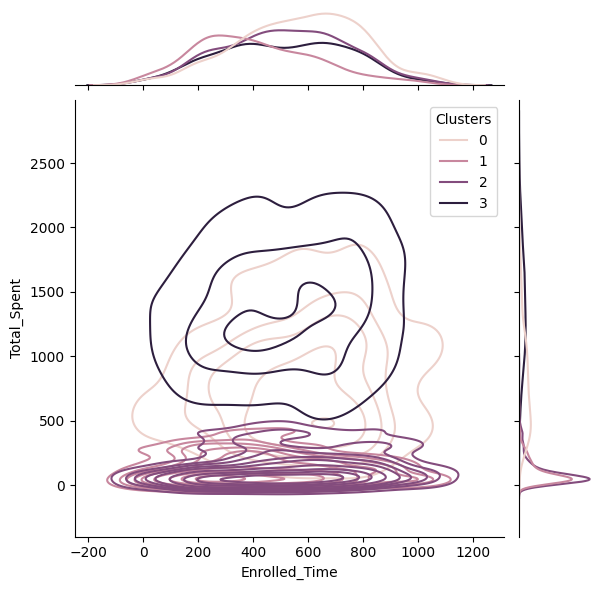

<Figure size 640x480 with 0 Axes>

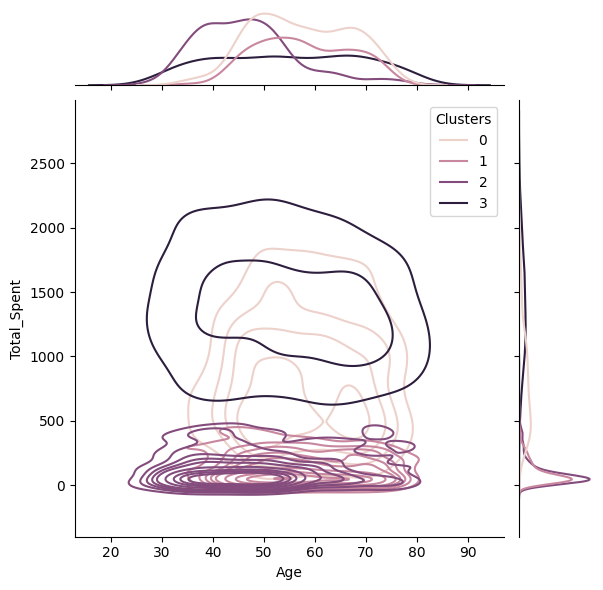

<Figure size 640x480 with 0 Axes>

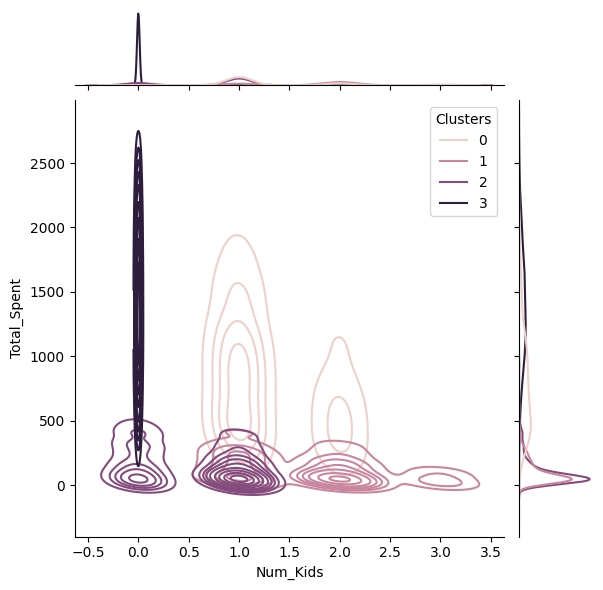

<Figure size 640x480 with 0 Axes>

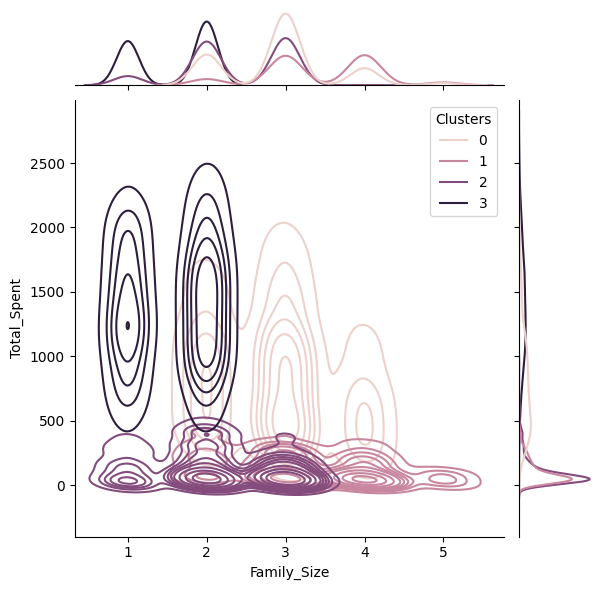

<Figure size 640x480 with 0 Axes>

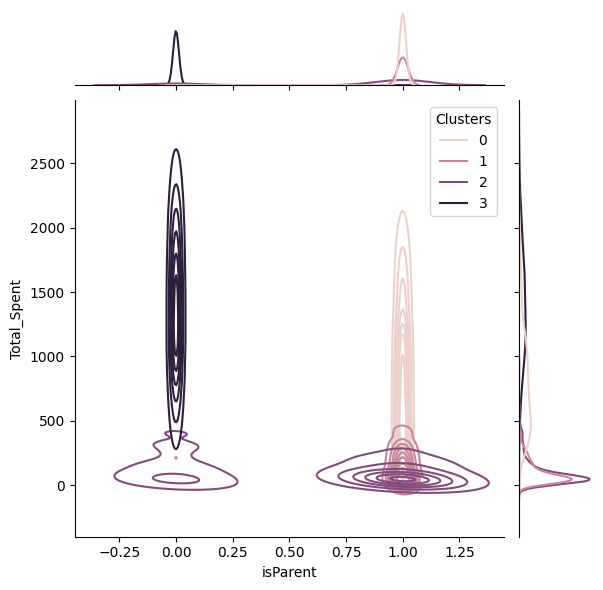

<Figure size 640x480 with 0 Axes>

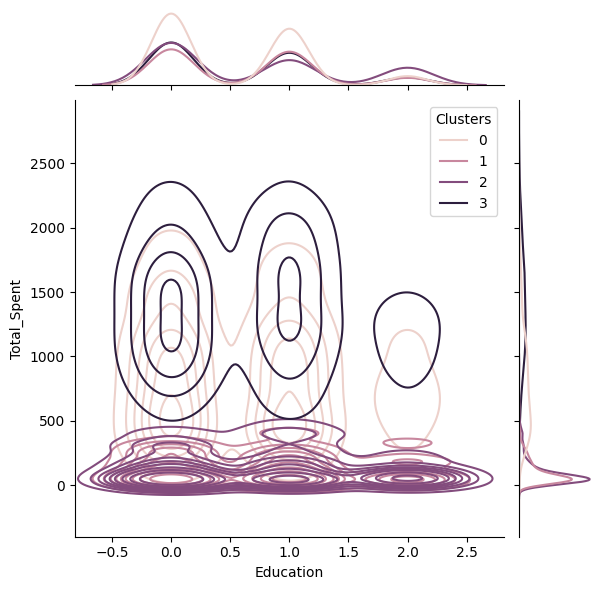

<Figure size 640x480 with 0 Axes>

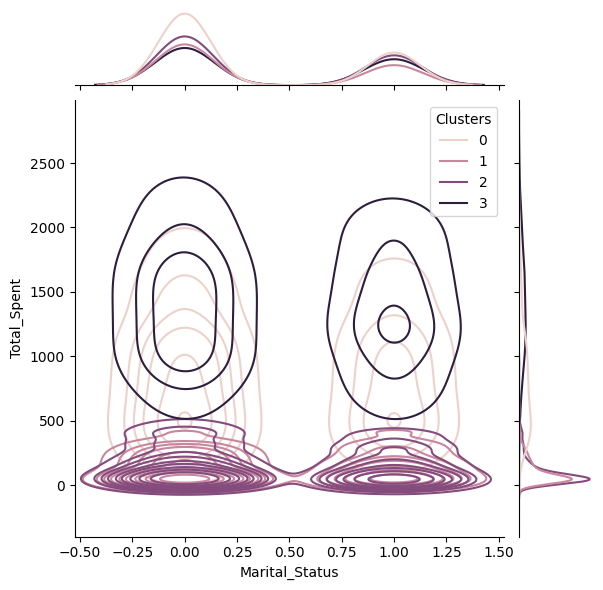

In [41]:
profile = [ 'Kidhome','Teenhome','Enrolled_Time', 'Age', 'Num_Kids', 'Family_Size', 'isParent', 'Education','Marital_Status']

for i in profile:
    plt.figure()
    sns.jointplot(x=df[i], y=df['Total_Spent'], hue =df['Clusters'], kind='kde')
    plt.show()